In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings

In [8]:
warnings.filterwarnings("ignore")

In [9]:
pd.set_option('display.max_rows',10000)
pd.set_option('display.min_rows',2000)
pd.set_option('display.column_space',30)
pd.set_option('display.max_colwidth',150)
pd.set_option('display.expand_frame_repr',True)

In [10]:
_end_dates    = pd.Series(pd.date_range(start="2020-10-08", end="2021-03-31", freq="D", tz='America/New_York'))
_start_dates  = _end_dates - pd.Timedelta(days=7)
_center_dates = _end_dates - pd.Timedelta(days=3.5)
end_dates     = _end_dates.apply(lambda x: x.timestamp())
center_dates  = _center_dates.apply(lambda x: x.timestamp())
start_dates   = _start_dates.apply(lambda x: x.timestamp())
_end_dates    = _end_dates.apply(lambda x:str(x).split(' ')[0])
_center_dates = _center_dates.apply(lambda x:str(x).split(' ')[0])
_start_dates  = _start_dates.apply(lambda x:str(x).split(' ')[0])


id_l = '/home/casonk/path/mmani_root/mmani0/shared_data/hot/push_file/IDL/'

In [11]:
irrel = [
    'automoderator',        '[deleted]',            'HCE_Replacement_Bot',  'Rangers_Bot', 
    'dropbox_bot',          'Website_Mirror_Bot',   'Metric_System_Bot',    'Fedora-Tip-Bot',
    'some_bot',             'Brigade_Bot',          'Link_Correction_Bot',  'Porygon-Bot',
    'karmaconspiracy_Bot',  'SWTOR_Helper_Bot',     'annoying_yes_bot',     'Antiracism_Bot',
    'qznc_bot',             'mma_gif_bot',          'QUICHE-BOT',           'bRMT_Bot',
    'hockey_gif_bot',       'nba_gif_bot',          'gifster_bot',          'imirror_bot',
    'okc_rating_bot',       'tennis_gif_bot',       'nfl_gif_bot',          'CPTModBot',
    'LocationBot',          'CreepySmileBot',       'FriendSafariBot',      'WritingPromptsBot',
    'CreepierSmileBot',     'Cakeday-Bot',          'Meta_Bot',             'soccer_gif_bot',
    'gunners_gif_bot',      'xkcd_number_bot',      'PokemonFlairBot',      'ChristianityBot',
    'cRedditBot',           'StreetFightMirrorBot', 'FedoraTipAutoBot',     'UnobtaniumTipBot',
    'astro-bot',            'TipMoonBot',           'PlaylisterBot',        'Wiki_Bot',
    'fedora_tip_bot',       'GunnersGifsBot',       'PGN-Bot',              'GunnitBot',
    'havoc_bot',            'Relevant_News_Bot',    'gfy_bot',              'RealtechPostBot',
    'imgurHostBot',         'Gatherer_bot',         'JumpToBot',            'DeltaBot',
    'Nazeem_Bot',           'PhoenixBot',           'AtheismModBot',        'IsItDownBot',
    'RFootballBot',         'KSPortBot',            'CompileBot',           'SakuraiBot',
    'asmrspambot',          'SurveyOfRedditBot',    'rule_bot',             'xkcdcomic_bot',
    'PloungeMafiaVoteBot',  'PoliticBot',           'Dickish_Bot_Bot',      'SuchModBot',
    'MultiFunctionBot',     'CasualMetricBot',      'xkcd_bot',             'VerseBot',
    'BeetusBot',            'GameDealsBot',         'BadLinguisticsBot',    'rhiever-bot',
    'gfycat-bot-sucksdick', 'chromabot',            'Readdit_Bot',          'disapprovalbot',
    'request_bot',          'define_bot',           'dogetipbot',           'techobot',
    'CaptionBot',           'rightsbot',            'colorcodebot',         'roger_bot',
    'ADHDbot',              'hearing-aid_bot',      'WikipediaCitationBot', 'PonyTipBot',
    'fact_check_bot',       'rusetipbot',           'classybot',            'NFLVideoBot',
    'MAGNIFIER_BOT',        'WordCloudBot2',        'JotBot',               'WeeaBot',
    'raddit-bot',           'tipmoonbot2',          'haiku_robot',          'ttumblrbots',
    'givesafuckbot',        'gabentipbot',          'serendipitybot',       'autowikibot',
    'topredditbot',         'ddlbot',               'bitofnewsbot',         'conspirobot',
    'bot',                  'Definition_Bot',       'redditbots',           'autourbanbot',
    'randnumbot',           'VideoLinkBot',         'transcribot',          'vertpornpostbot',
    'vpbot14',              'verticalgifbot',       'animemod',             'nfl_mod',
    'groupbot',             'jobautomator',         'cricketmatchbot',      'ukpolbot',
    'politicsmoderatorbot', 'usi-bot',              'fplmoderator',         'commentorofposts',
    'nba_mod',              '2soccer2bot',          'ffbot',                'wishlistbot',
    'bodybuildingbot',      'latherbot',            'kickopenthedoorbot',   'fantasymod',
    'steroidsbot',          'darnbot',              'cfb_referee',          'cbbbot',
    'sbpotdbot',            'twitterinfo_bot',      'nfcaaofficialrefbot',  'rlcd-bot',
    'hw2-bot',              'hwsbot',               'feetpicsbot',          'nfl_gamethread',
    'cursedrobot',          'sexstatsbot',          'judgement_bot_aita',   'repostsleuthbot',
    'savevideo',            'mytoppost',            'transcribersofreddit', 'keepingdankmemesdank',
    'virtualautumn',        'muchmuchkarma',        'gdt_bot',              'nfl_gdt_bot',
    'rnews_mod',            'goodbotautomod',
    ]

irrel = [i.lower() for i in irrel]

In [12]:
def subtlie(sub):
    sub_mask = trimmed_df['Subreddit'] == sub
    sub_auths[sub] = trimmed_df[sub_mask]['Source'].append(trimmed_df[sub_mask]['Target']).unique()
    sub_size[sub] = sub_size.get(sub, []) + [len(sub_auths[sub])]
    sub_posts[sub] = sub_posts.get(sub, []) + [trimmed_df[sub_mask]['Count'].sum()]
    source_mask = trimmed_df['Source'].isin(sub_auths[sub])
    target_mask = trimmed_df['Target'].isin(sub_auths[sub])
    total_links = trimmed_df[source_mask | target_mask]['Count'].sum()
    sub_mask2 = trimmed_df[source_mask | target_mask]['Subreddit'] == sub
    internal_links = trimmed_df[source_mask | target_mask][sub_mask2]['Count'].sum()
    sub_i[sub] = sub_i.get(sub, []) + [internal_links]
    external_links = total_links - internal_links
    sub_e[sub] = sub_e.get(sub, []) + [external_links]
    sub_ei[sub] = sub_ei.get(sub, []) + [(external_links - internal_links) / total_links]
    return sub_ei[sub]

sub_auths = {}
sub_size = {}
sub_posts = {}
sub_i = {}
sub_e = {}
sub_ei = {}

for date in _center_dates:
    df = pd.read_pickle((id_l + date + ('/EDGE_LIST_RAW_{}__.pkl'.format(1))))
    source_mask = df['Source'].isin(irrel)
    target_mask = df['Target'].isin(irrel)
    trimmed_df = df[(~source_mask) & (~target_mask)]
    
    subtlie('conspiracy')
    subtlie('worldnews')
    subtlie('news')
    # subtlie('worldpolitics')
    # subtlie('worldevents')
    # subtlie('business')
    # subtlie('economics')
    # subtlie('law')
    # subtlie('government')
    # subtlie('history')
    subtlie('politics')
    # subtlie('politics2')
    # subtlie('americanpolitics')
    subtlie('ukpolitics')
    # subtlie('socialism')
    subtlie('conservative')
    # subtlie('anarchism')
    # subtlie('progressive')
    # subtlie('liberal')
    # subtlie('conservatives')
    # subtlie('republicanism')
    # subtlie('anarchist')
    # subtlie('marxism')
    # subtlie('objectivism')
    # subtlie('communist')
    subtlie('libertarian')
    # subtlie('egalitarianism')
    # subtlie('freethought')
    # subtlie('stateoftheunion')
    # subtlie('politicaldiscussion')
    subtlie('politicalhumor')
    # subtlie('culture')
    # subtlie('corruption')
    # subtlie('propaganda')
    # subtlie('debate')
    # subtlie('votingtheory')
    # subtlie('racism')
    # subtlie('moderatepolitics')
    # subtlie('foodforthought')
    # subtlie('democrats')
    # subtlie('intelligence')
    # subtlie('campaigns')
    # subtlie('privacy')
    # subtlie('collapse')
    # subtlie('activism')
    # subtlie('electionreform')
    # subtlie('republican')
    # subtlie('wayofthebern')
    # subtlie('antiwork')
    # subtlie('the_donald')
    # subtlie('asktrumpsupporters')
    # subtlie('truepolitics')
    # subtlie('politic')
    # subtlie('libertarianleft')
    # subtlie('libertariandebates')
    # subtlie('libertariansocialism')
    # subtlie('demsocialist')
    # subtlie('censorship')
    # subtlie('centrist')
    # subtlie('ask_politics')
    # subtlie('neutralpolitics')

In [13]:
ei_data = pd.DataFrame(sub_ei, index=_center_dates)
e_data = pd.DataFrame(sub_e, index=_center_dates)
i_data = pd.DataFrame(sub_i, index=_center_dates)
size_data = pd.DataFrame(sub_size, index=_center_dates) 
post_data = pd.DataFrame(sub_posts, index=_center_dates)

In [14]:
num1 = 1

ei_data.to_pickle((id_l + ('/SUBALITK/SUBALITK_EI_DATA_{}__.pkl'.format(num1))))
e_data.to_pickle((id_l + ('/SUBALITK/SUBALITK_E_DATA_{}__.pkl'.format(num1))))
i_data.to_pickle((id_l + ('/SUBALITK/SUBALITK_I_DATA_{}__.pkl'.format(num1))))
size_data.to_pickle((id_l + ('/SUBALITK/SUBALITK_SIZE_DATA_{}__.pkl'.format(num1))))
post_data.to_pickle((id_l + ('/SUBALITK/SUBALITK_POST_DATA_{}__.pkl'.format(num1))))

In [15]:
num1 = 1

ei_data = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_EI_DATA_{}__.pkl'.format(num1))))
e_data = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_E_DATA_{}__.pkl'.format(num1))))
i_data = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_I_DATA_{}__.pkl'.format(num1))))
size_data = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_SIZE_DATA_{}__.pkl'.format(num1))))
post_data = pd.read_pickle((id_l + ('/SUBALITK/SUBALITK_POST_DATA_{}__.pkl'.format(num1))))

In [18]:
subbert = [
    'conspiracy',
    'worldnews',
    'news',
    # 'worldpolitics',
    # 'worldevents',
    # 'business',
    # 'economics',
    # 'law',
    # 'government',
    # 'history',
    'politics',
    # 'politics2',
    # 'americanpolitics',
    'ukpolitics',
    # 'socialism',
    'conservative',
    # 'anarchism',
    # 'progressive',
    # 'liberal',
    # 'conservatives',
    # 'republicanism',
    # 'anarchist',
    # 'marxism',
    # 'objectivism',
    # 'communist',
    'libertarian',
    # 'egalitarianism',
    # 'freethought',
    # 'stateoftheunion',
    # 'politicaldiscussion',
    'politicalhumor',
    # 'culture',
    # 'corruption',
    # 'propaganda',
    # 'debate',
    # 'votingtheory',
    # 'racism',
    # 'moderatepolitics',
    # 'foodforthought',
    # 'democrats',
    # 'intelligence',
    # 'campaigns',
    # 'privacy',
    # 'collapse',
    # 'activism',
    # 'electionreform',
    # 'republican'
    # 'wayofthebern',
    # 'antiwork',
    # 'the_donald',
    # 'asktrumpsupporters',
    # 'truepolitics',
    # 'politic',
    # 'libertarianleft',
    # 'libertariandebates',
    # 'libertariansocialism',
    # 'demsocialist',
    # 'censorship',
    # 'centrist',
    # 'ask_politics',
    # 'neutralpolitics',
    ]

In [19]:
ei_data[subbert]

,conspiracy,worldnews,news,politics,ukpolitics,conservative,libertarian,politicalhumor
2020-10-04,-0.060722,0.382691,0.143454,0.141121,0.225027,0.097603,0.398823,0.662957
2020-10-05,-0.038788,0.491771,0.296999,0.070187,0.008024,0.092991,0.255191,0.583210
2020-10-06,-0.024351,0.511855,0.441003,0.009202,0.057986,0.229922,0.108473,0.597611
2020-10-07,-0.038926,0.512320,0.409814,0.015290,0.197663,0.226649,0.132307,0.579931
2020-10-08,0.028793,0.411776,0.335511,0.045740,0.011628,0.447694,0.025974,0.674323
2020-10-09,-0.018436,0.331781,0.325546,0.050272,0.373686,0.242215,0.040631,0.596407
2020-10-10,0.103793,0.222760,0.315027,0.115830,0.387072,0.209804,0.261164,0.640869
2020-10-11,0.138466,0.227980,0.319310,0.144588,0.506156,0.259292,0.204082,0.712155
2020-10-12,0.199218,0.297985,0.567017,0.134973,0.536545,0.287299,0.270421,0.705113
2020-10-13,0.143672,0.308049,0.332561,0.046900,0.532361,0.330137,0.118251,0.690149


<AxesSubplot:>

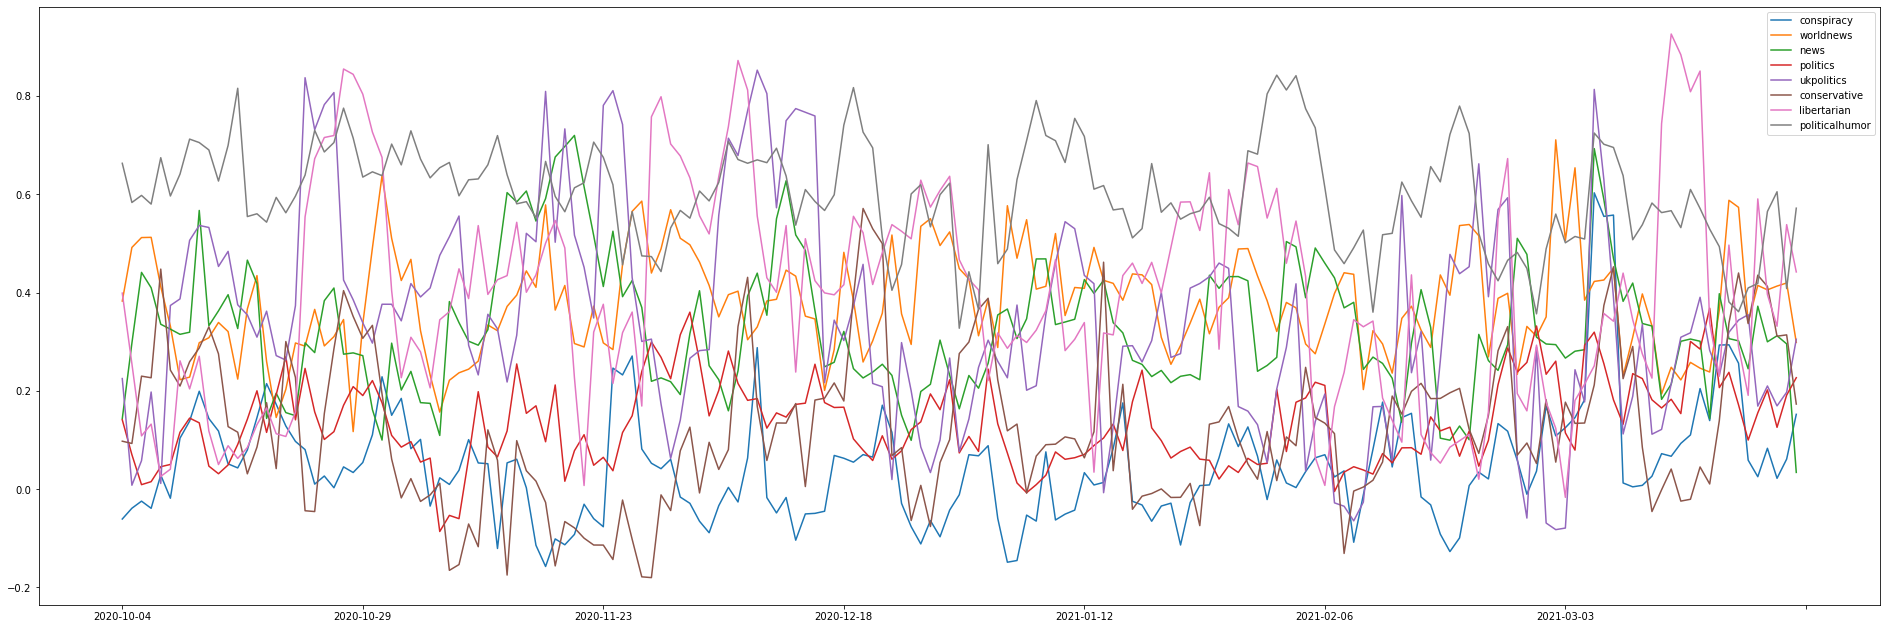

In [20]:
ei_data[subbert].plot(figsize=(33,11))

In [21]:
plt.style.use('dark_background')

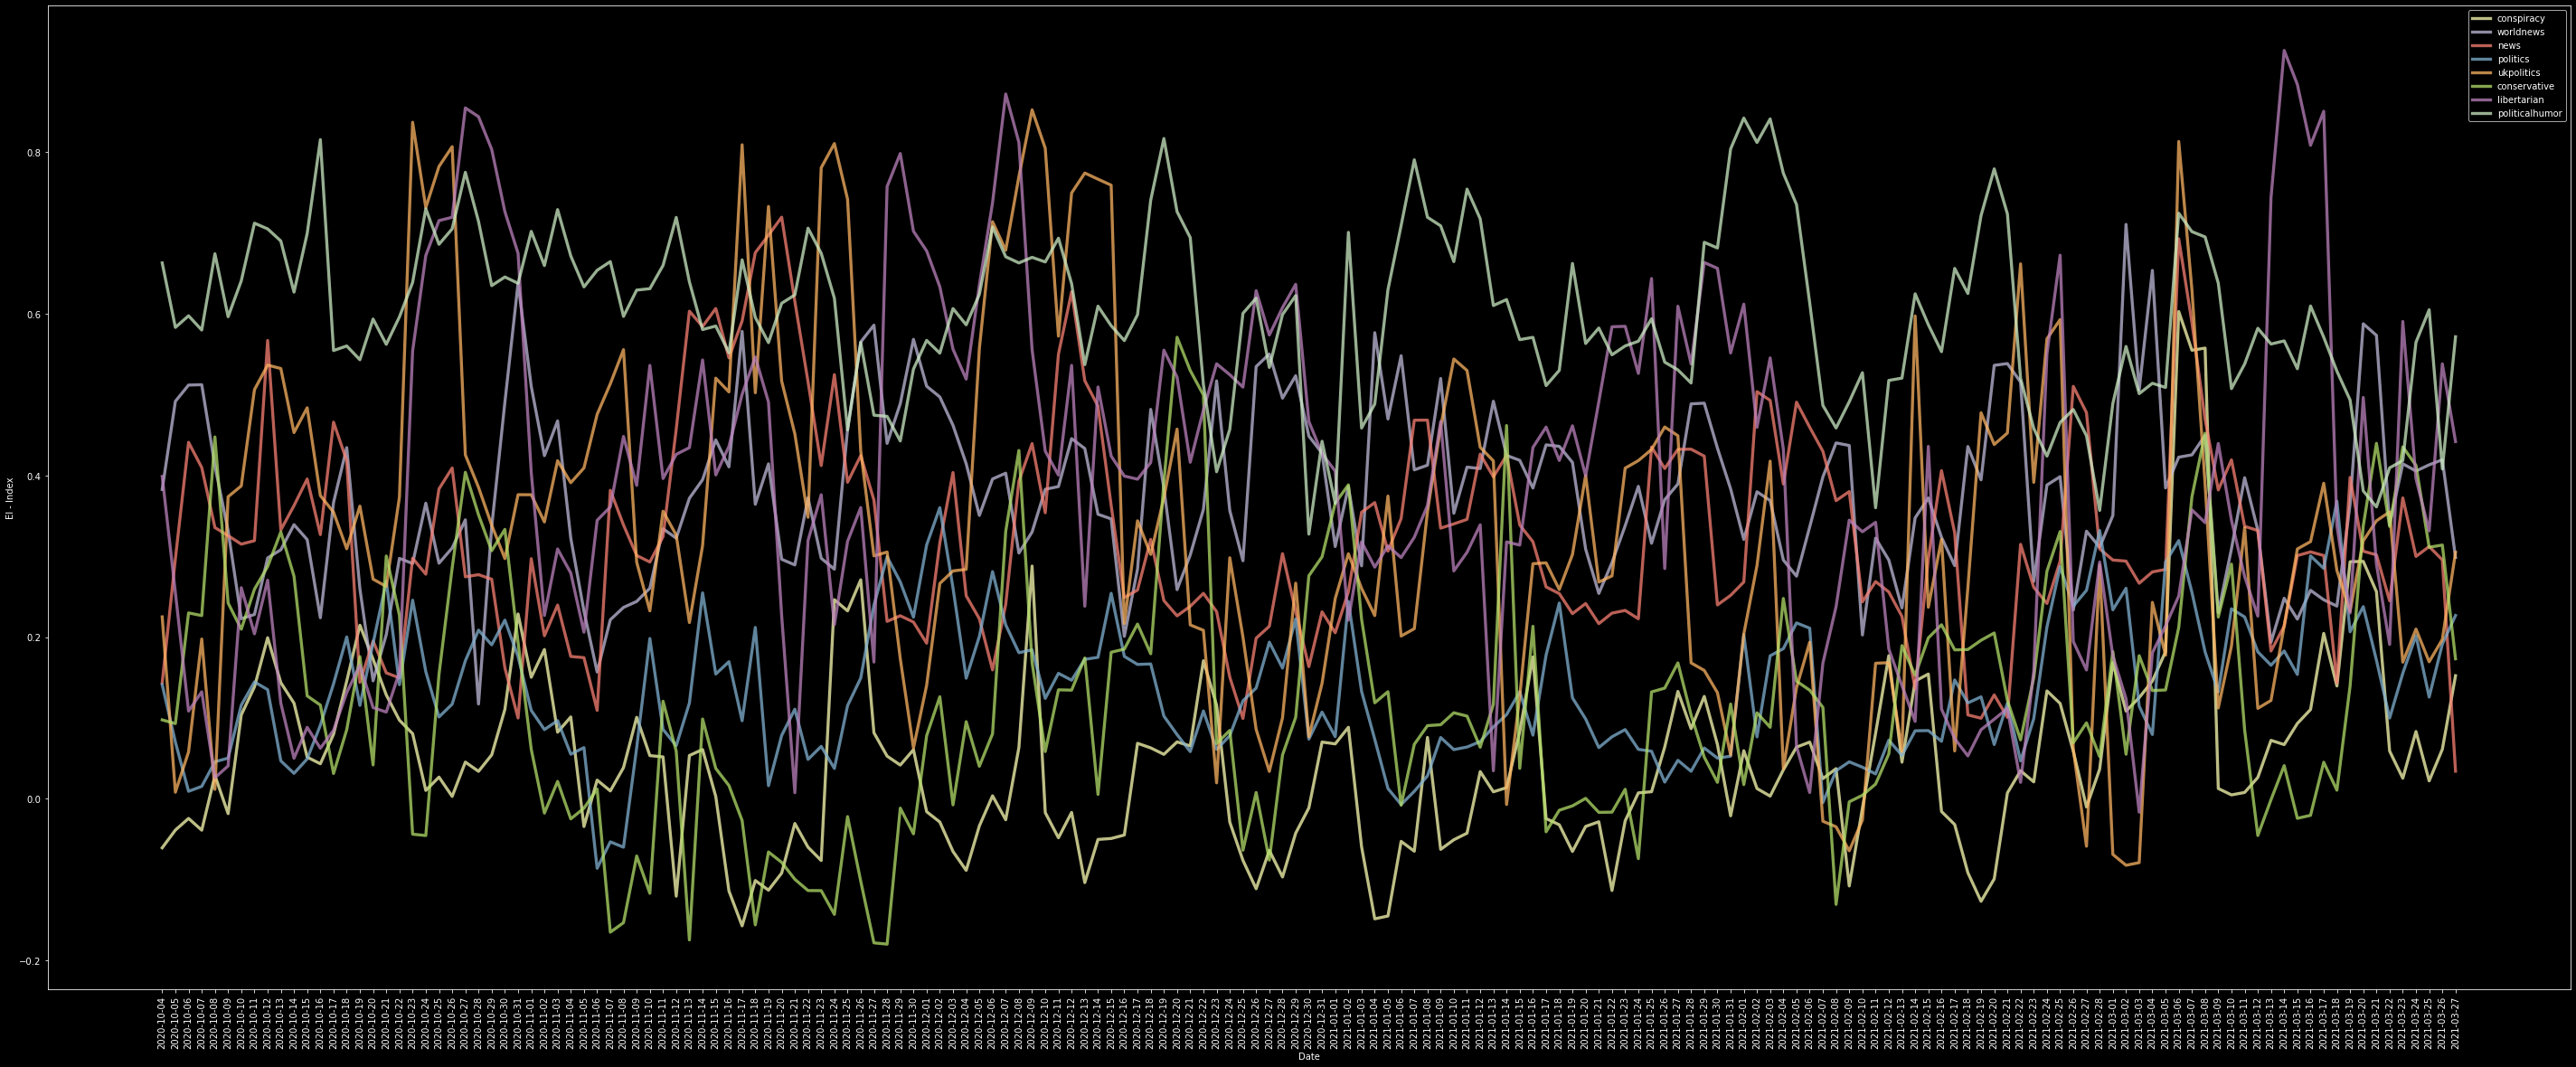

In [22]:
fig = plt.figure(figsize=(50,20))
plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)
for sub in ei_data[subbert].columns:
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, alpha=0.75, label=sub)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('EI - Index')
plt.legend()

conspiracy election imporntance : -0.3015991962953039
conspiracy insurrection imporntance : 0.6021053255862906
worldnews election imporntance : 0.37791825359015174
worldnews insurrection imporntance : -0.43789606915828744
news election imporntance : 0.7231934999620194
news insurrection imporntance : -0.10079496072383189
politics election imporntance : 0.6241658269258512
politics insurrection imporntance : 0.7323788590445746
ukpolitics election imporntance : -0.2620768933937429
ukpolitics insurrection imporntance : 0.048497183606936264
conservative election imporntance : 0.3676470589933359
conservative insurrection imporntance : -0.22475059933580865
libertarian election imporntance : -0.32050462026378124
libertarian insurrection imporntance : 0.2678775780630701
politicalhumor election imporntance : -0.5695091741661437
politicalhumor insurrection imporntance : -0.25757544339510885


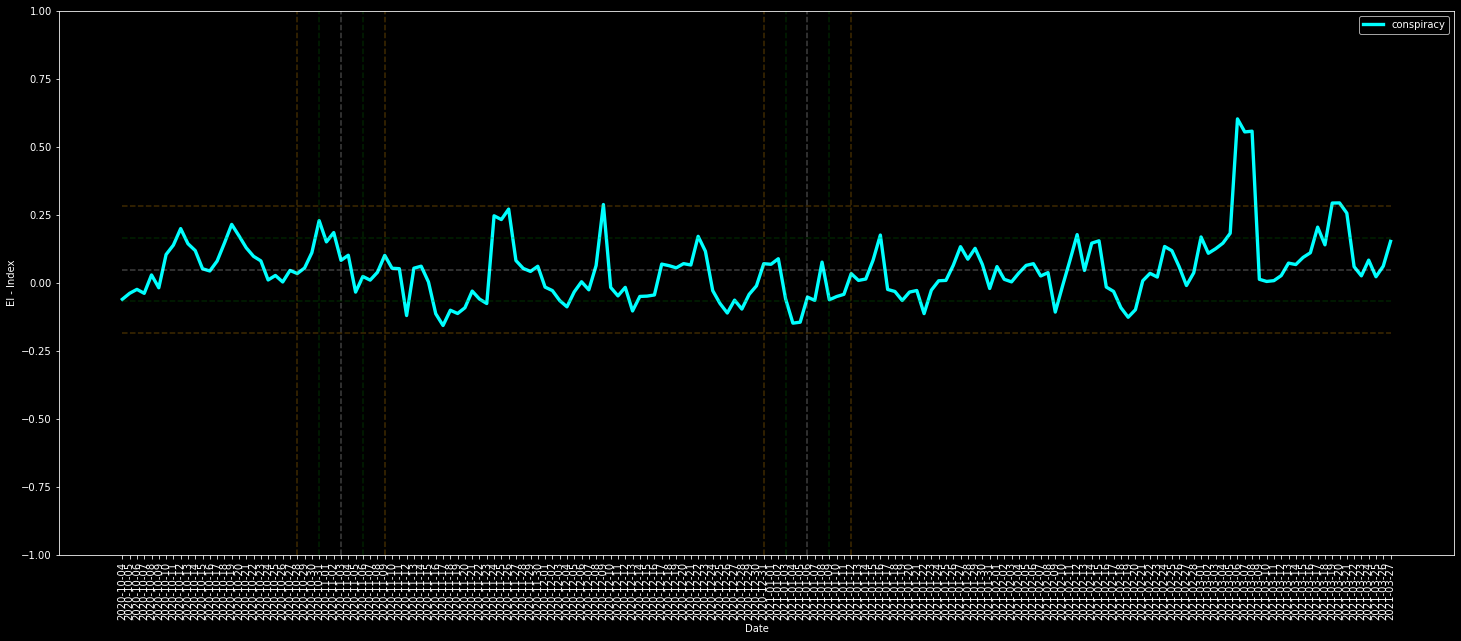

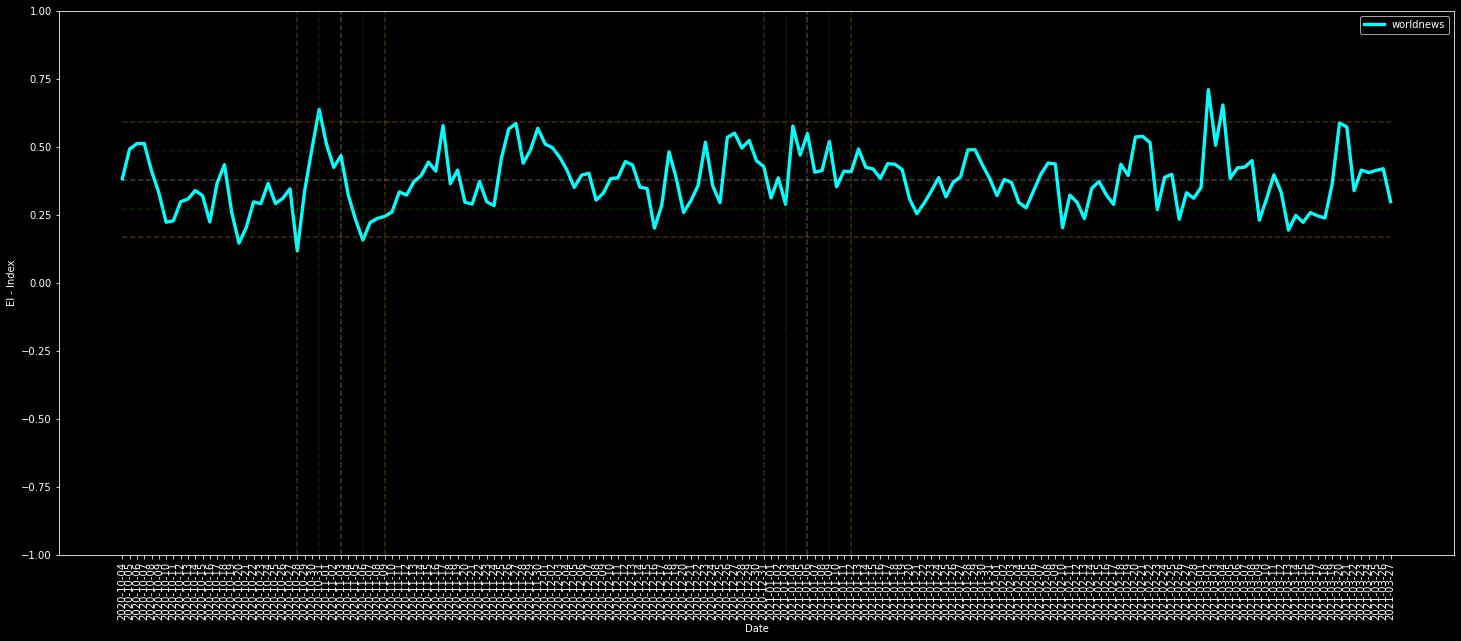

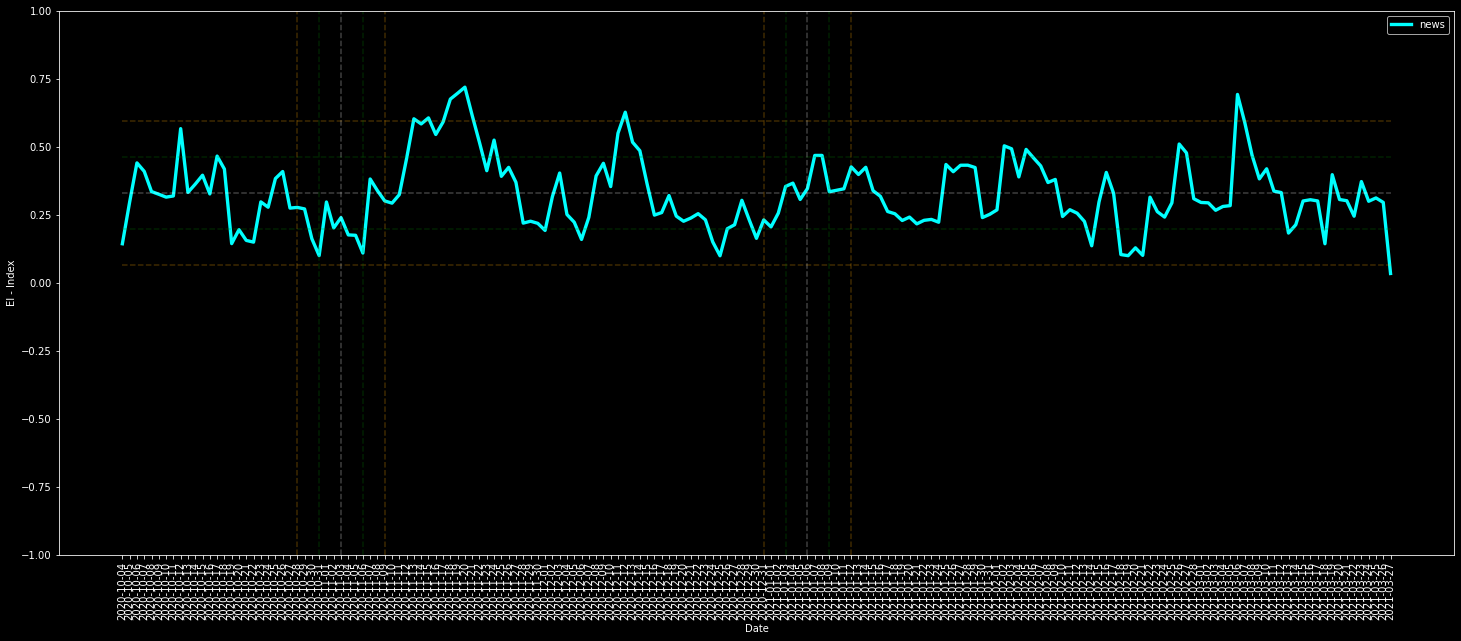

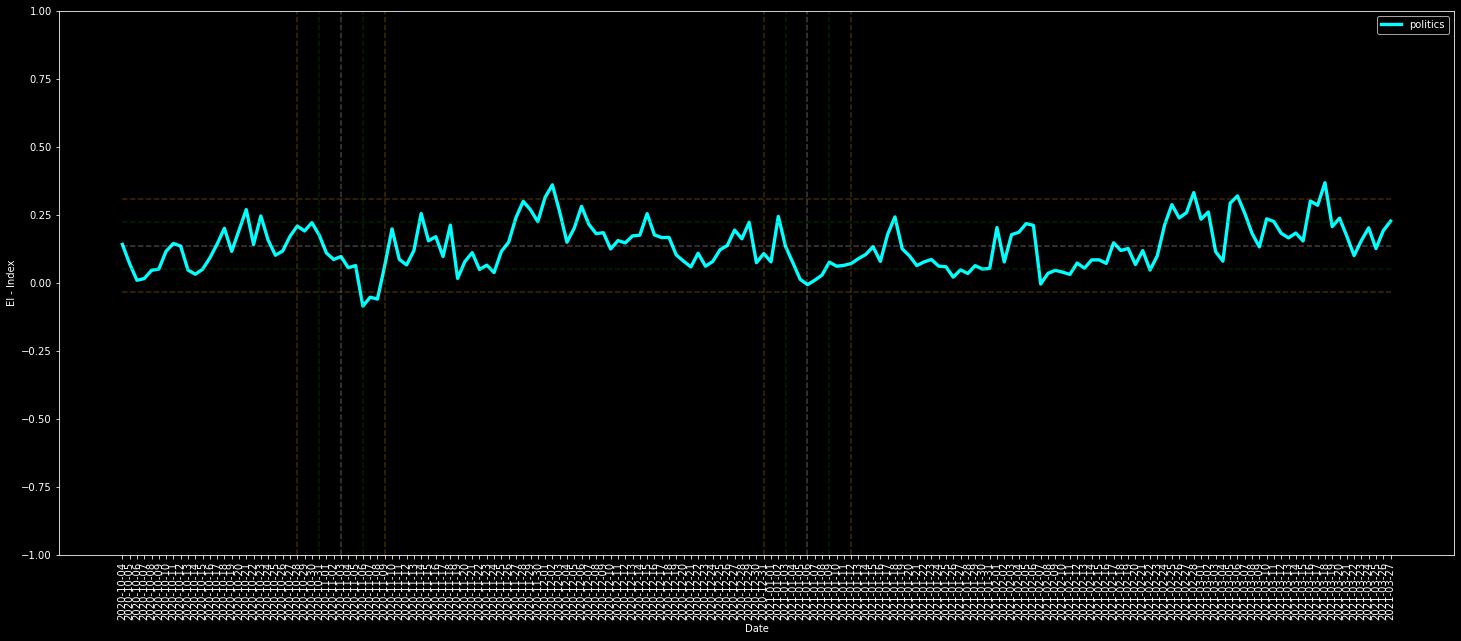

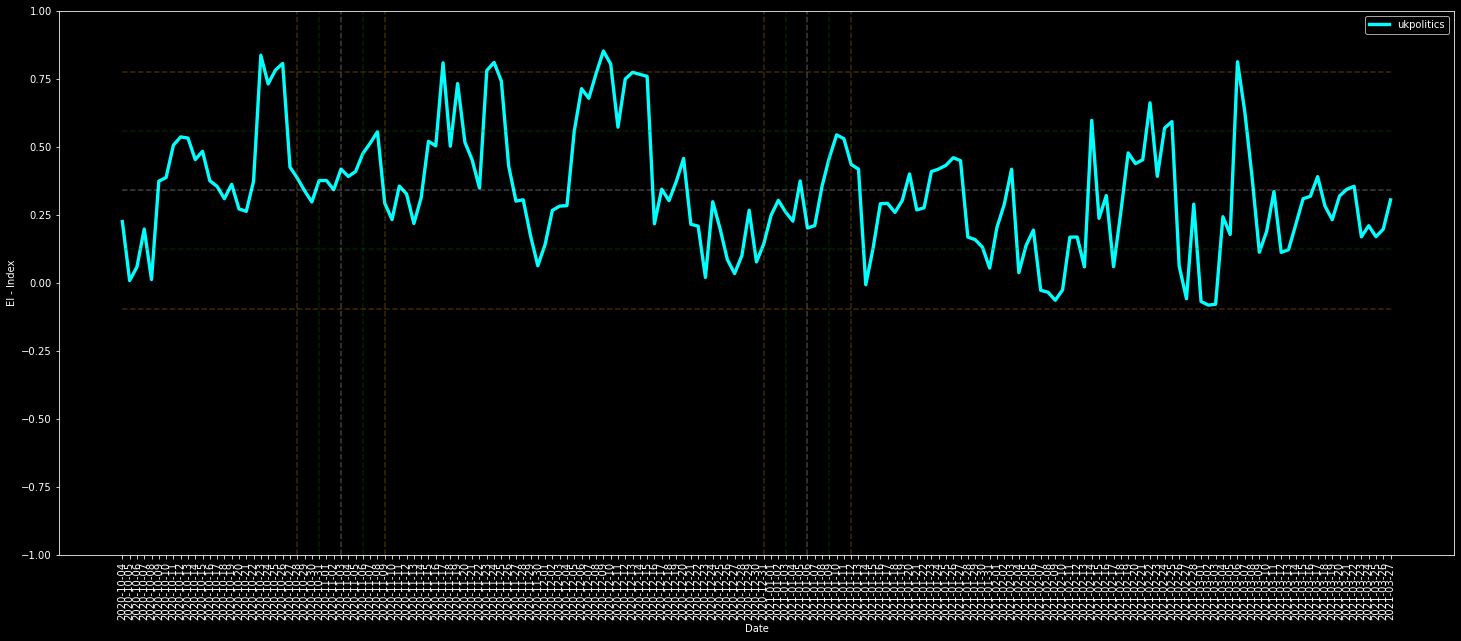

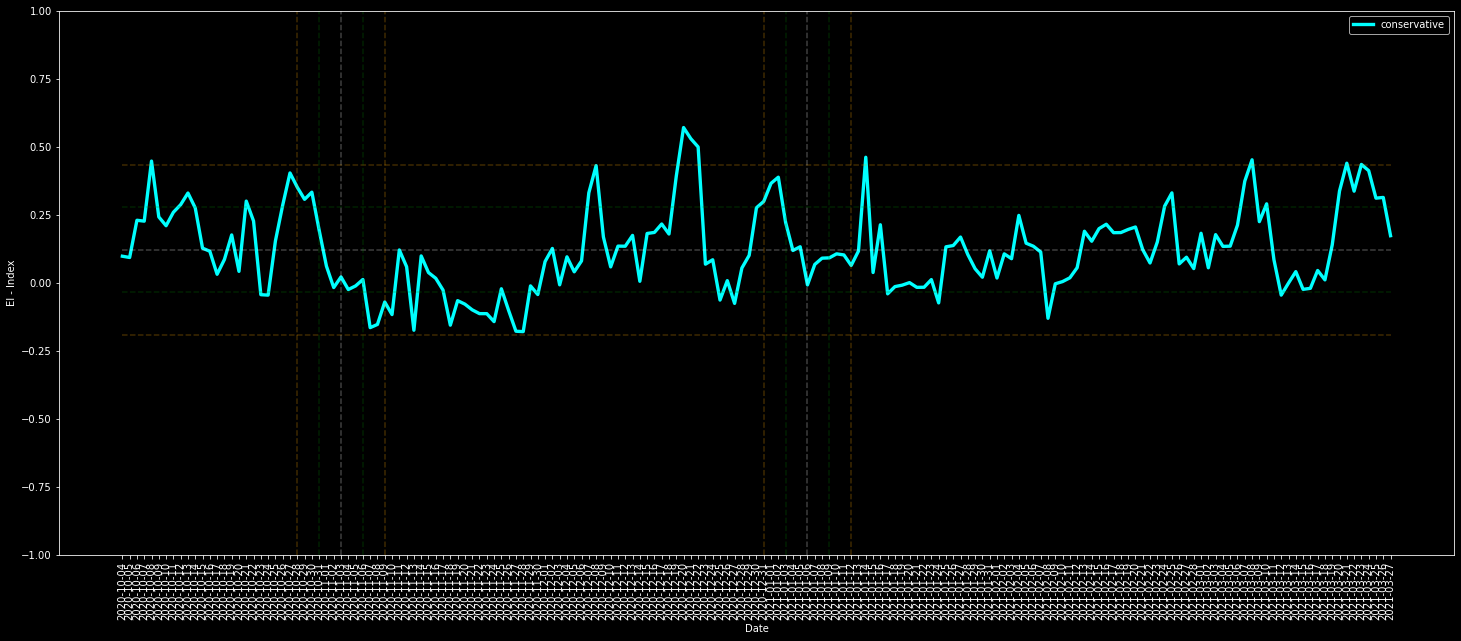

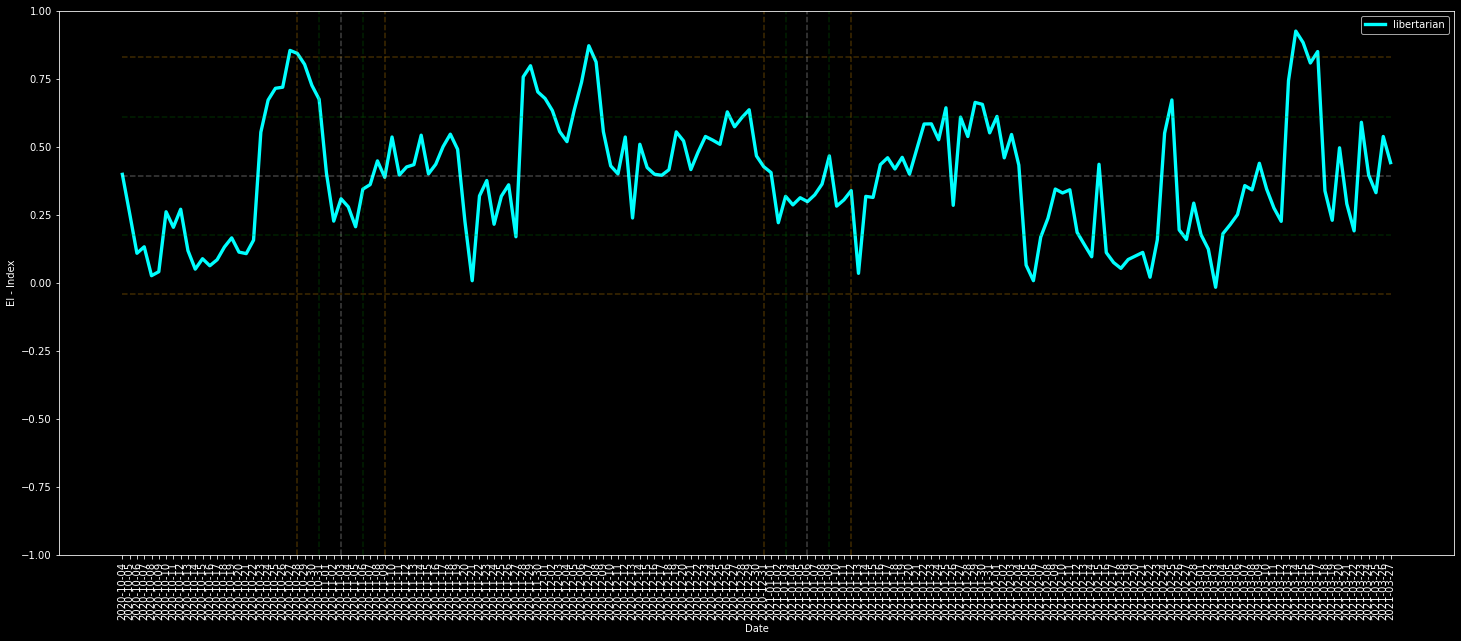

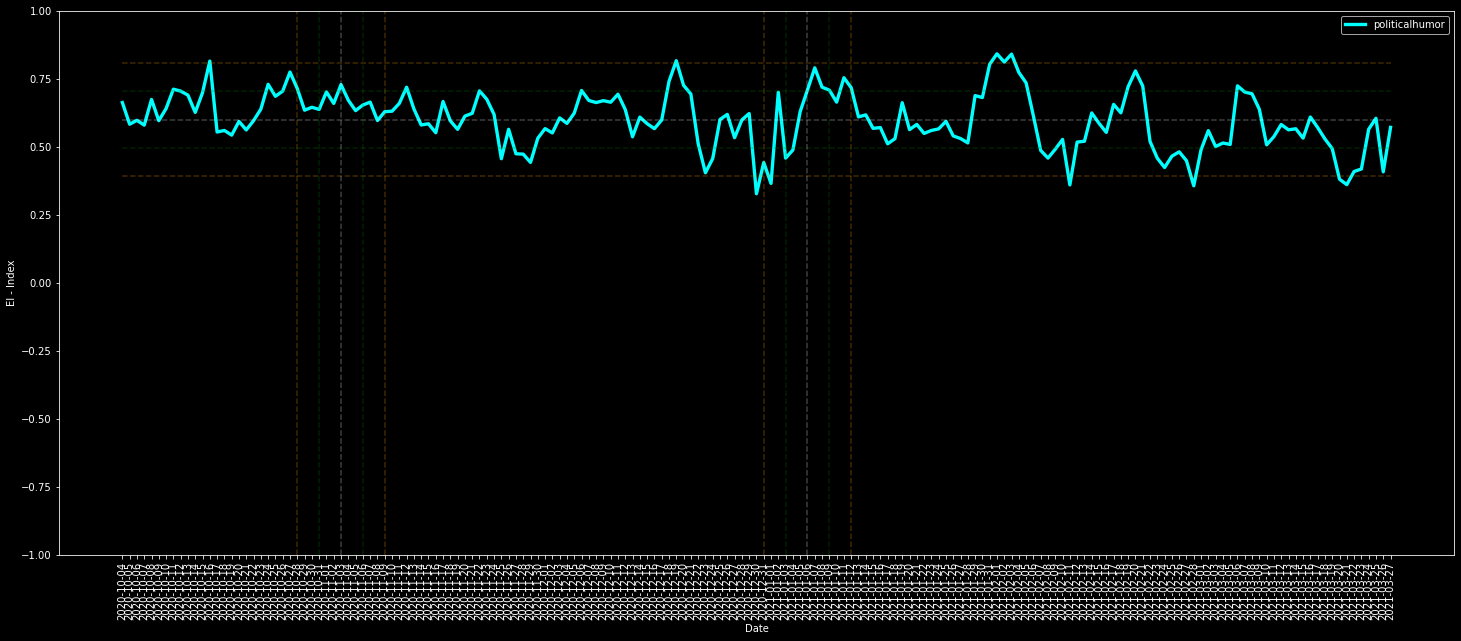

In [23]:
for sub in ei_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(ei_data.index, ei_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('EI - Index')
    mu = ei_data[subbert][sub].mean()
    sig = ei_data[subbert][sub].std()
    elect_dates = ['2020-10-28','2020-10-29','2020-10-30','2020-10-31','2020-11-01','2020-11-02','2020-11-03','2020-11-04','2020-11-05','2020-11-06','2020-11-07','2020-11-08','2020-11-09']
    inskt_dates = ['2020-12-31','2021-01-01','2021-01-02','2021-01-03','2021-01-04','2021-01-05','2021-01-06','2021-01-07','2021-01-08','2021-01-09','2021-01-10','2021-01-11','2021-01-12']
    elect_vales = [(mu - ei_data[subbert][sub][date]) / sig for date in elect_dates]
    print(sub, 'election imporntance :', pd.Series(elect_vales).mean())
    inskt_vales = [(mu - ei_data[subbert][sub][date]) / sig for date in inskt_dates]
    print(sub, 'insurrection imporntance :', pd.Series(inskt_vales).mean())
    plt.plot(['2020-10-04','2021-03-27'], [mu+sig,mu+sig], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-10-04','2021-03-27'], [mu-sig,mu-sig], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-10-04','2021-03-27'], [mu+2*sig,mu+2*sig], alpha=0.25, c='orange', ls='--')
    plt.plot(['2020-10-04','2021-03-27'], [mu-2*sig,mu-2*sig], alpha=0.25, c='orange', ls='--')
    # plt.plot(['2020-10-04','2021-03-27'], [mu+3*sig,mu+3*sig], alpha=0.25, c='red', ls='--')
    # plt.plot(['2020-10-04','2021-03-27'], [mu-3*sig,mu-3*sig], alpha=0.25, c='red', ls='--')
    plt.plot(['2020-10-04','2021-03-27'], [mu,mu], alpha=0.25, c='white', ls='--')
    plt.plot(['2021-01-06','2021-01-06'], [-1,1], alpha=0.25, c='white', ls='--')
    plt.plot(['2021-01-09','2021-01-09'], [-1,1], alpha=0.25, c='green', ls='--')
    plt.plot(['2021-01-03','2021-01-03'], [-1,1], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-12-31','2020-12-31'], [-1,1], alpha=0.25, c='orange', ls='--')
    plt.plot(['2021-01-12','2021-01-12'], [-1,1], alpha=0.25, c='orange', ls='--')
    plt.plot(['2020-11-03','2020-11-03'], [-1,1], alpha=0.25, c='white', ls='--')
    plt.plot(['2020-10-31','2020-10-31'], [-1,1], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-11-06','2020-11-06'], [-1,1], alpha=0.25, c='green', ls='--')
    plt.plot(['2020-10-28','2020-10-28'], [-1,1], alpha=0.25, c='orange', ls='--')
    plt.plot(['2020-11-09','2020-11-09'], [-1,1], alpha=0.25, c='orange', ls='--')
    plt.ylim(-1,1)
    plt.legend()

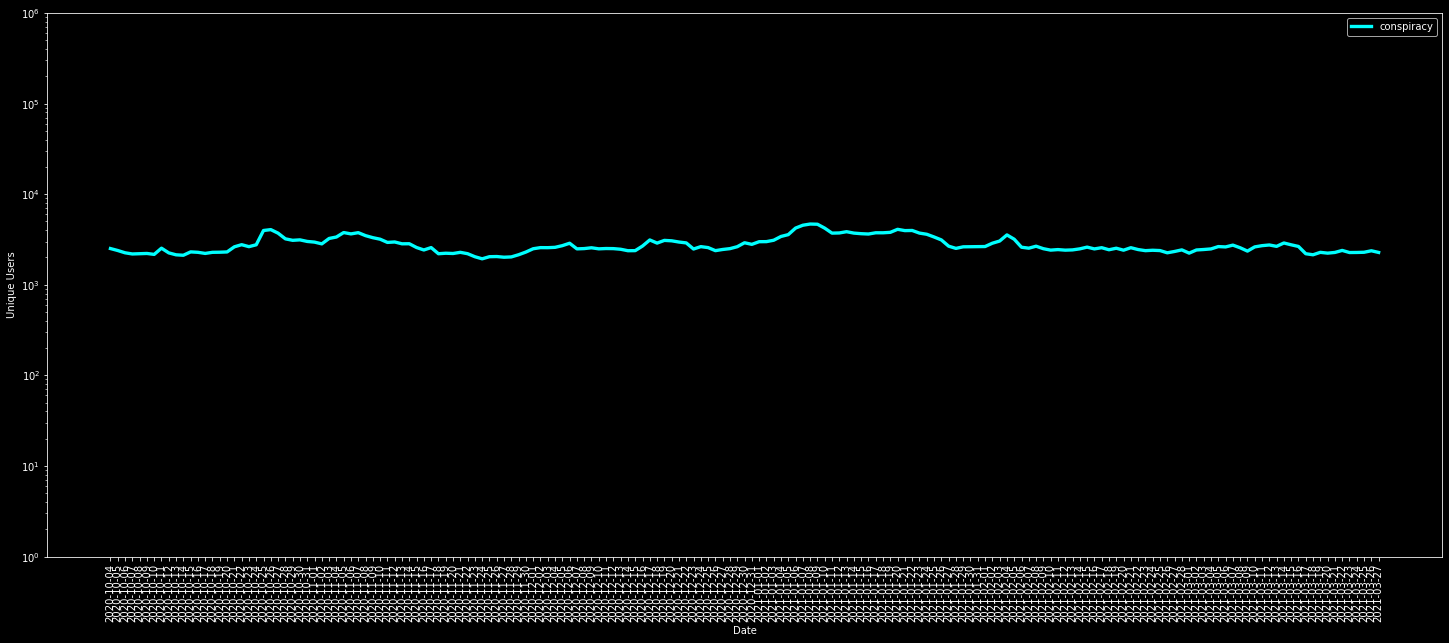

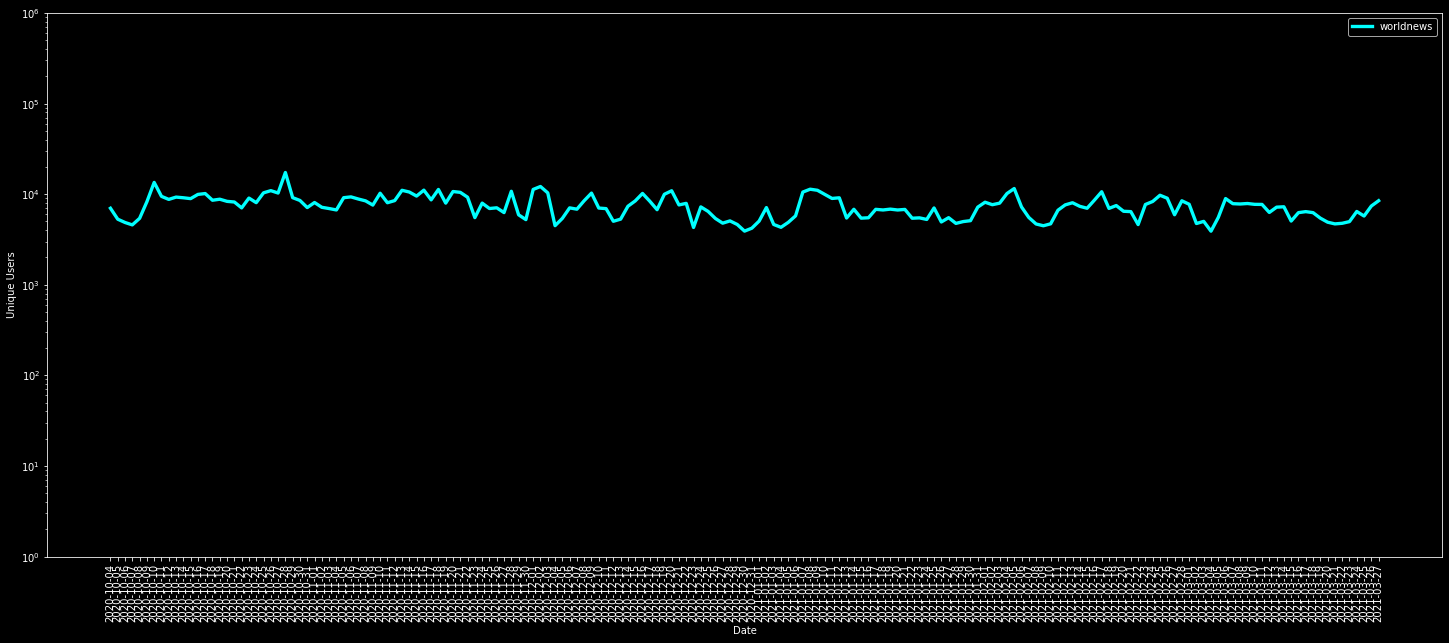

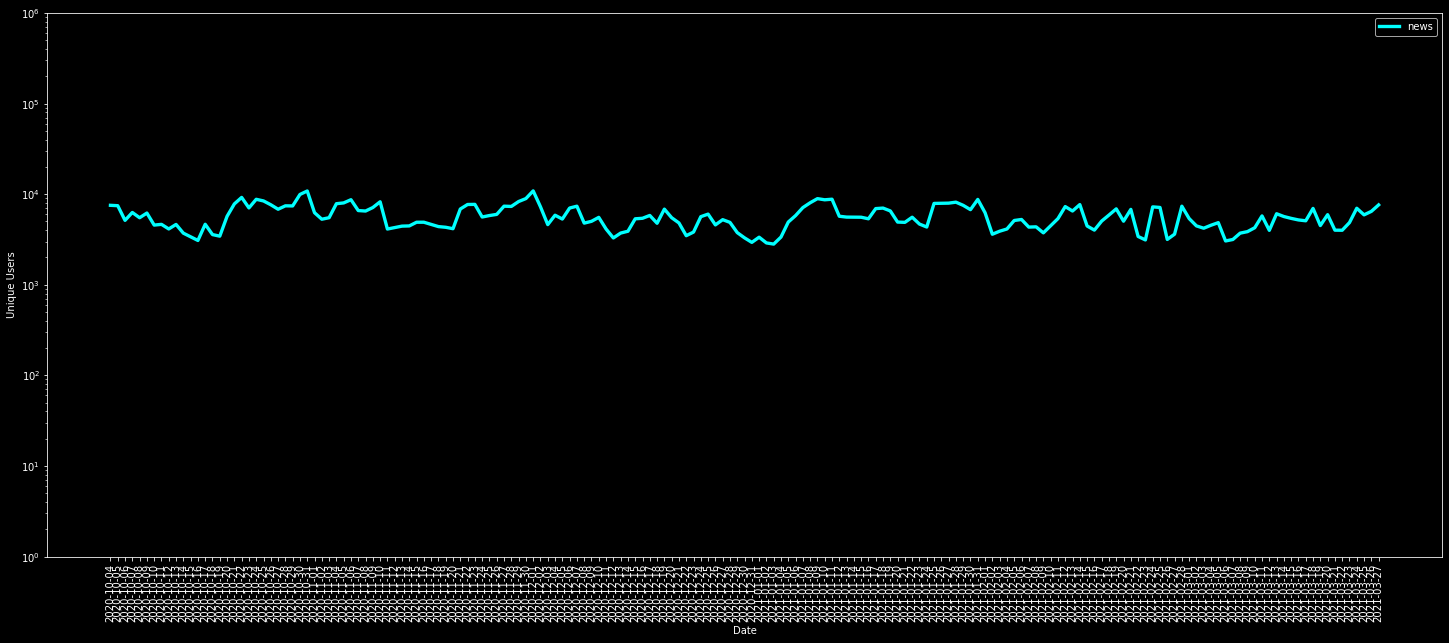

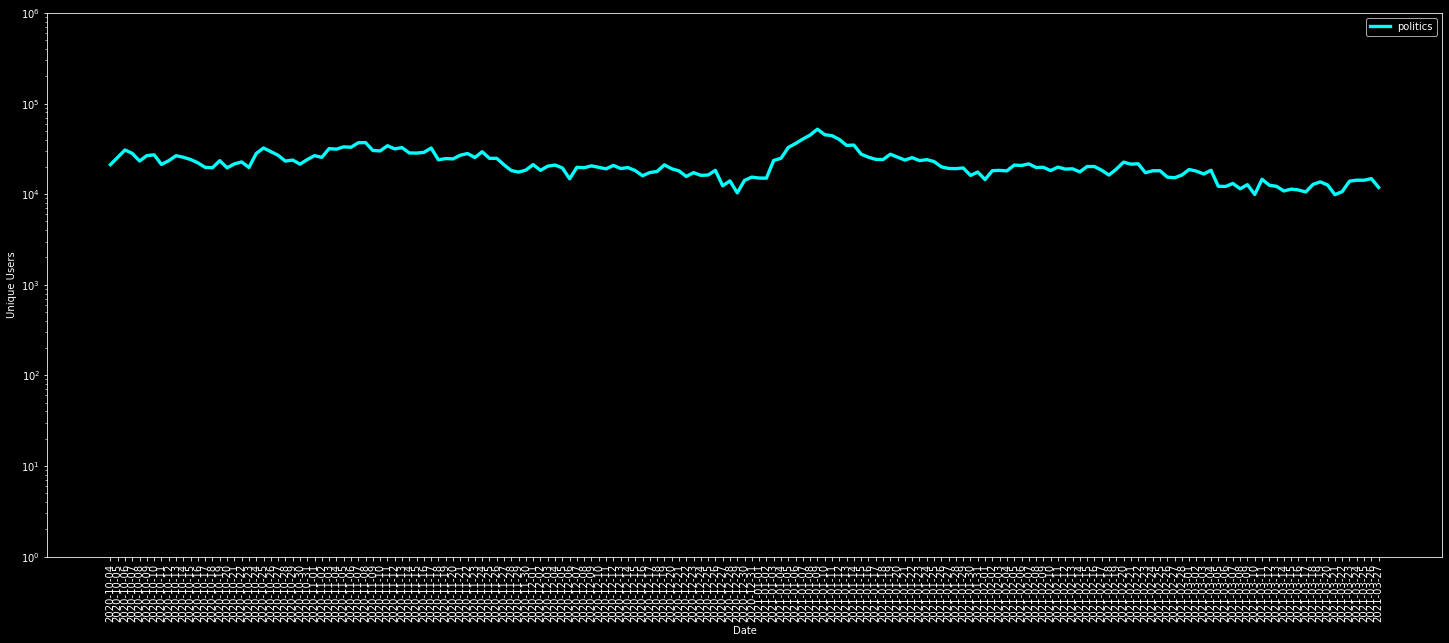

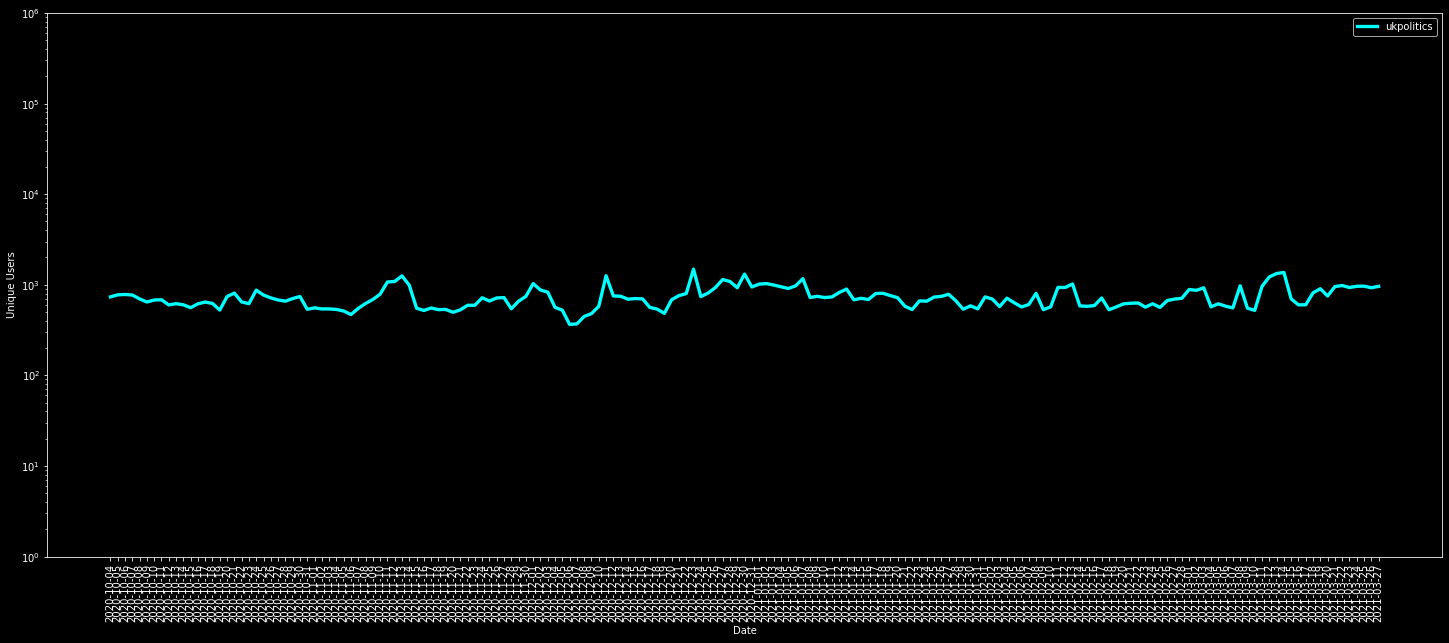

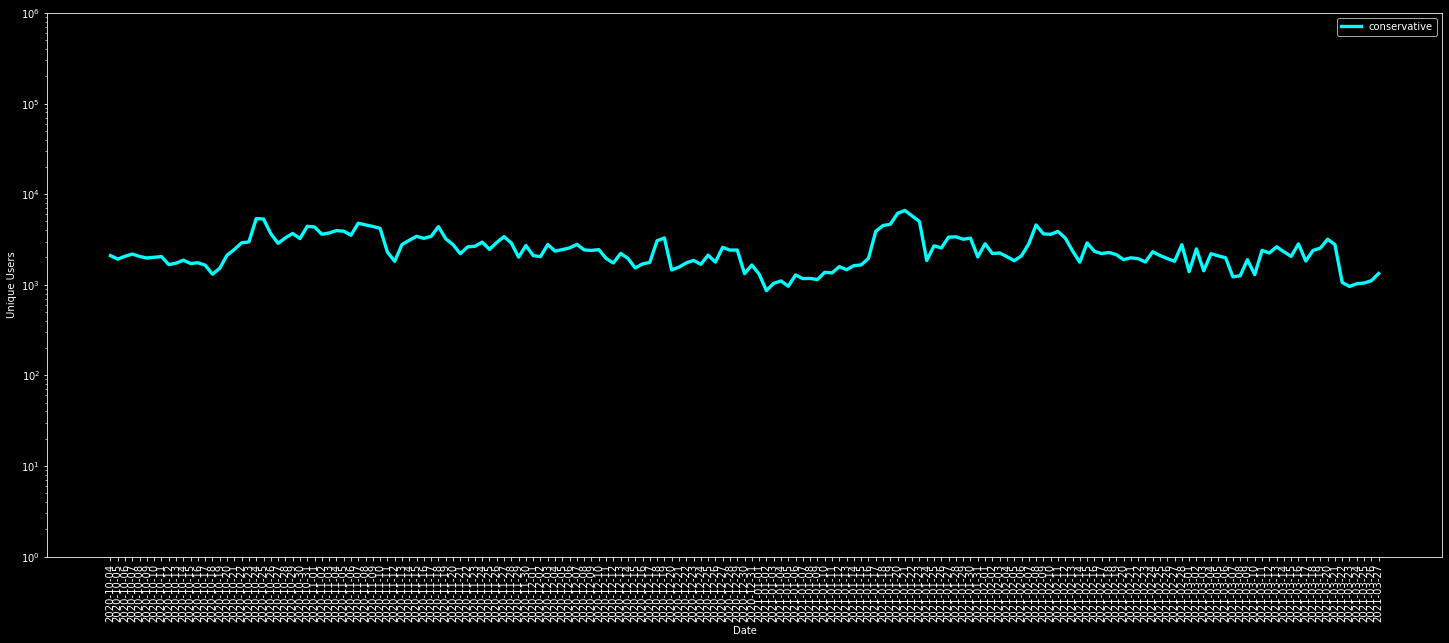

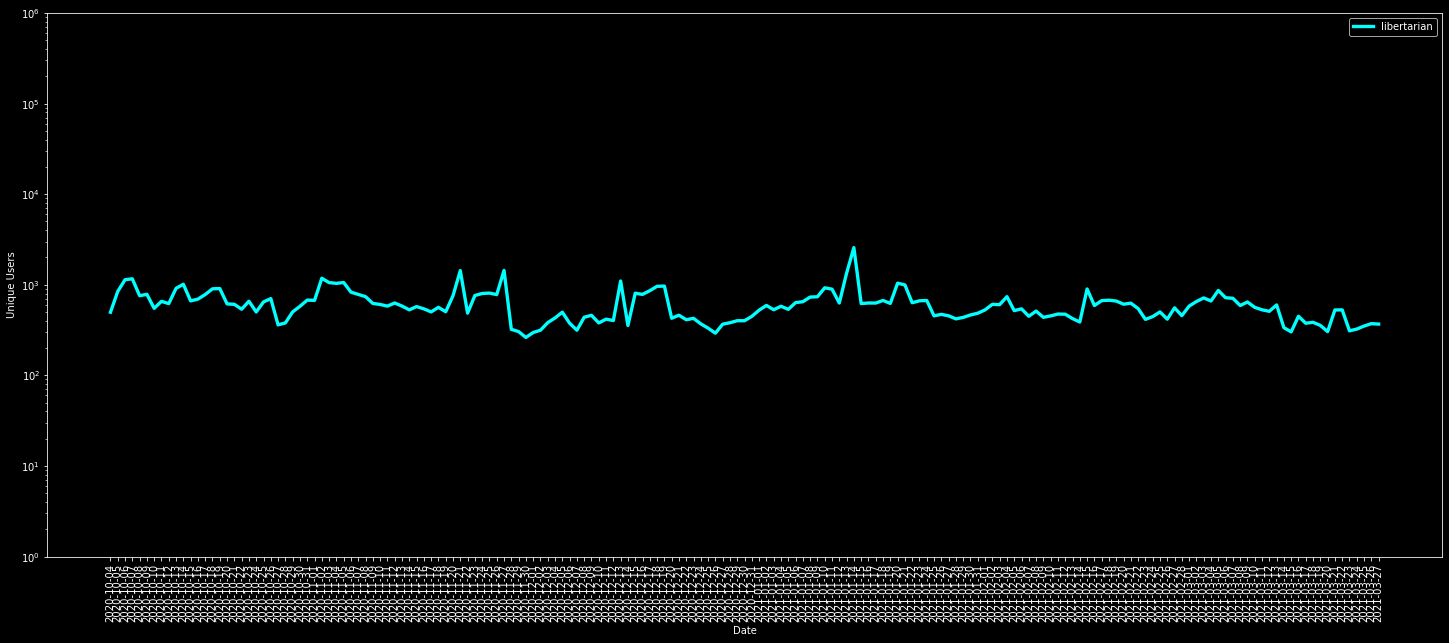

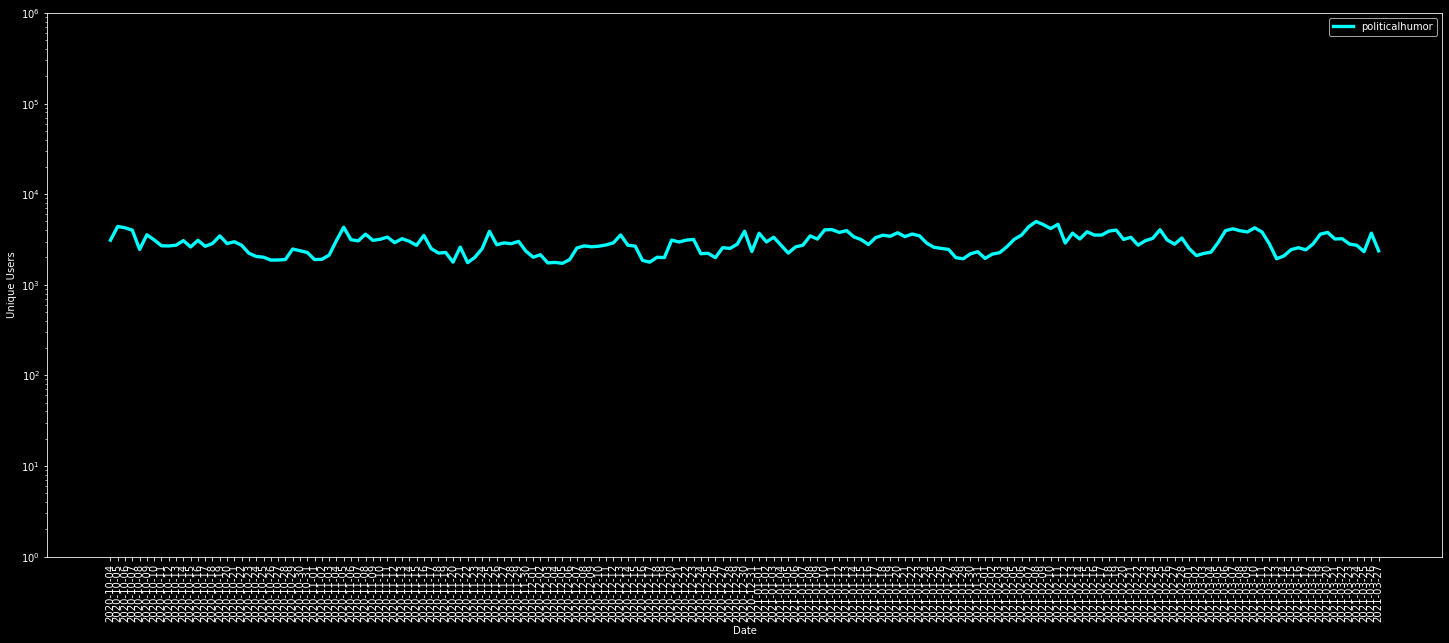

In [24]:
for sub in size_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(size_data.index, size_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Users')
    plt.ylim(1,1000000)  
    plt.yscale('log')
    plt.legend()

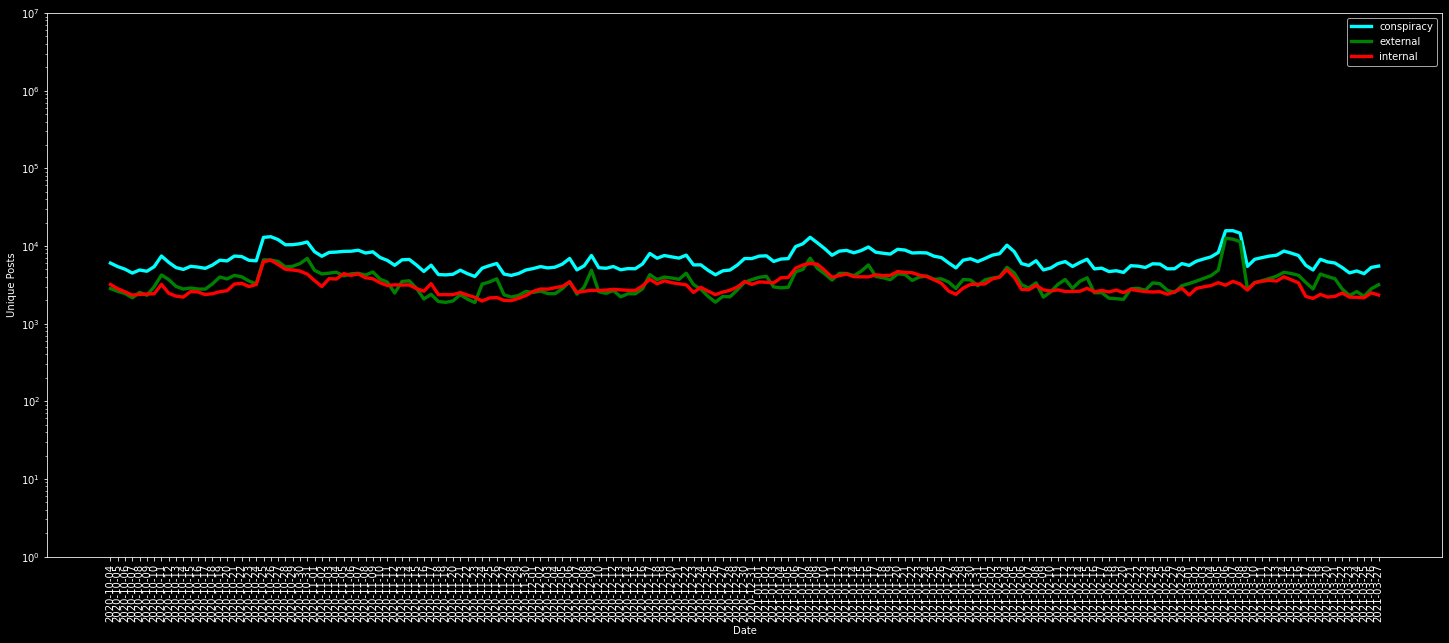

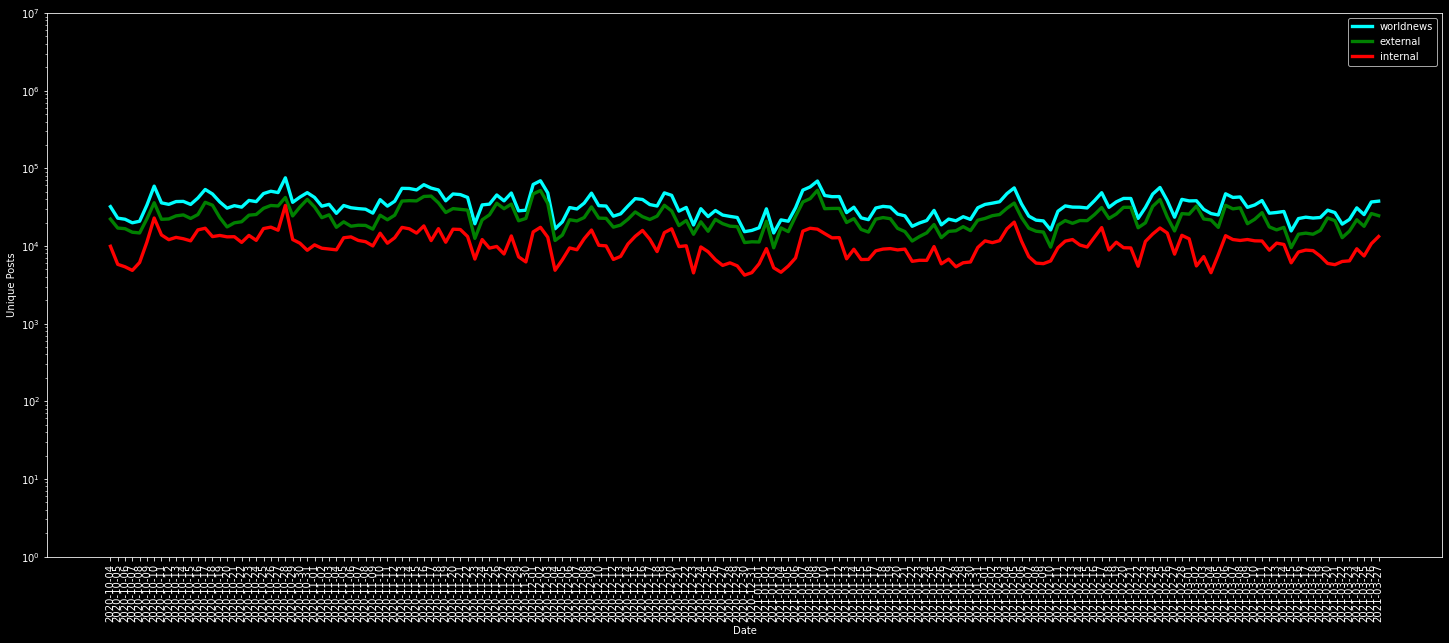

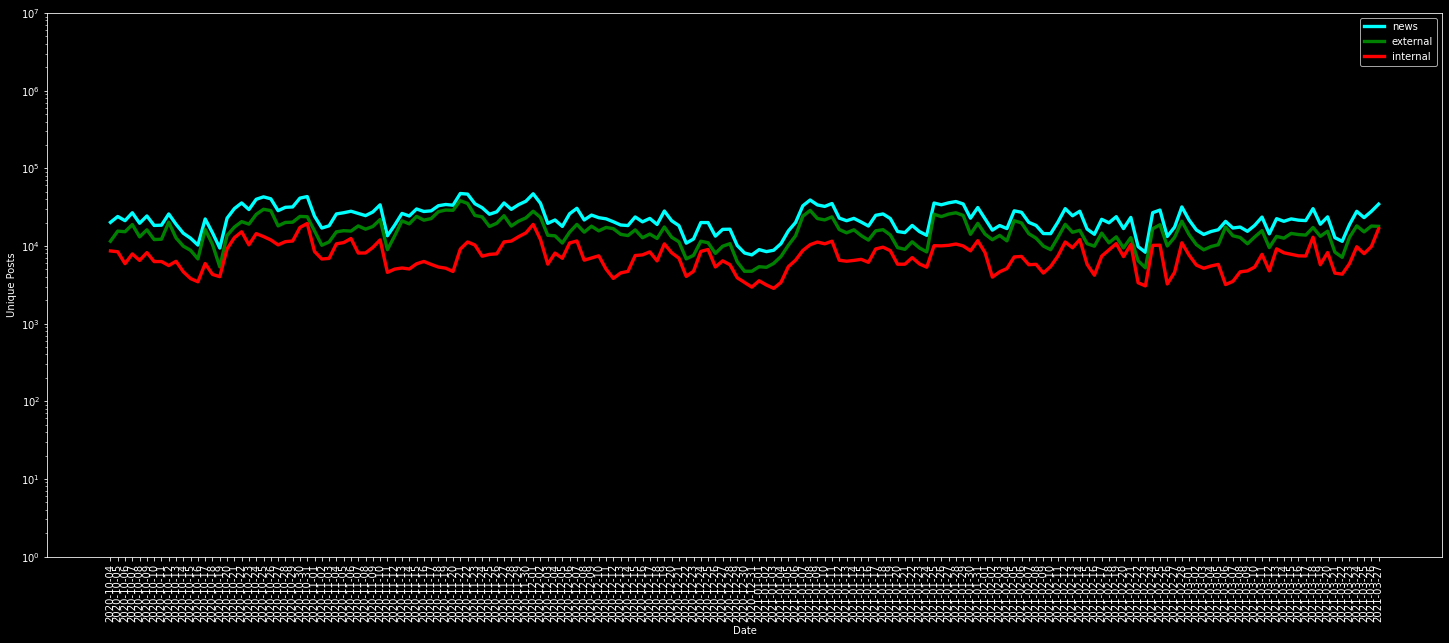

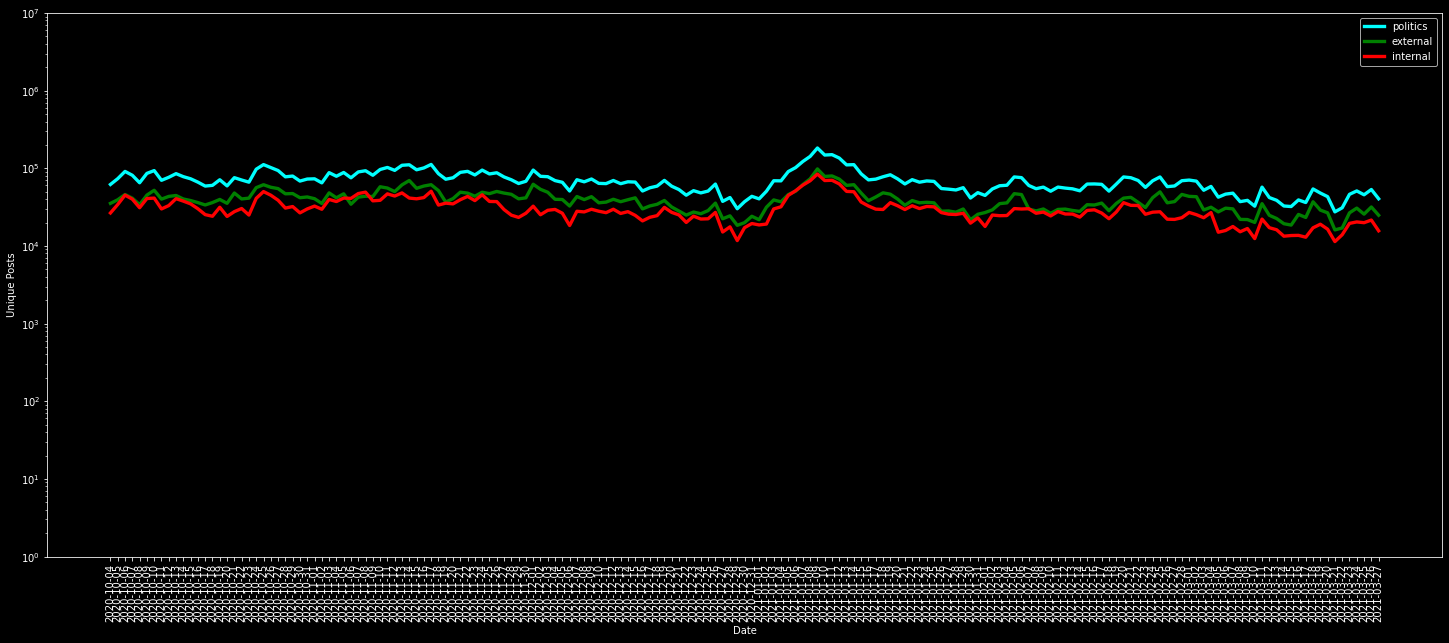

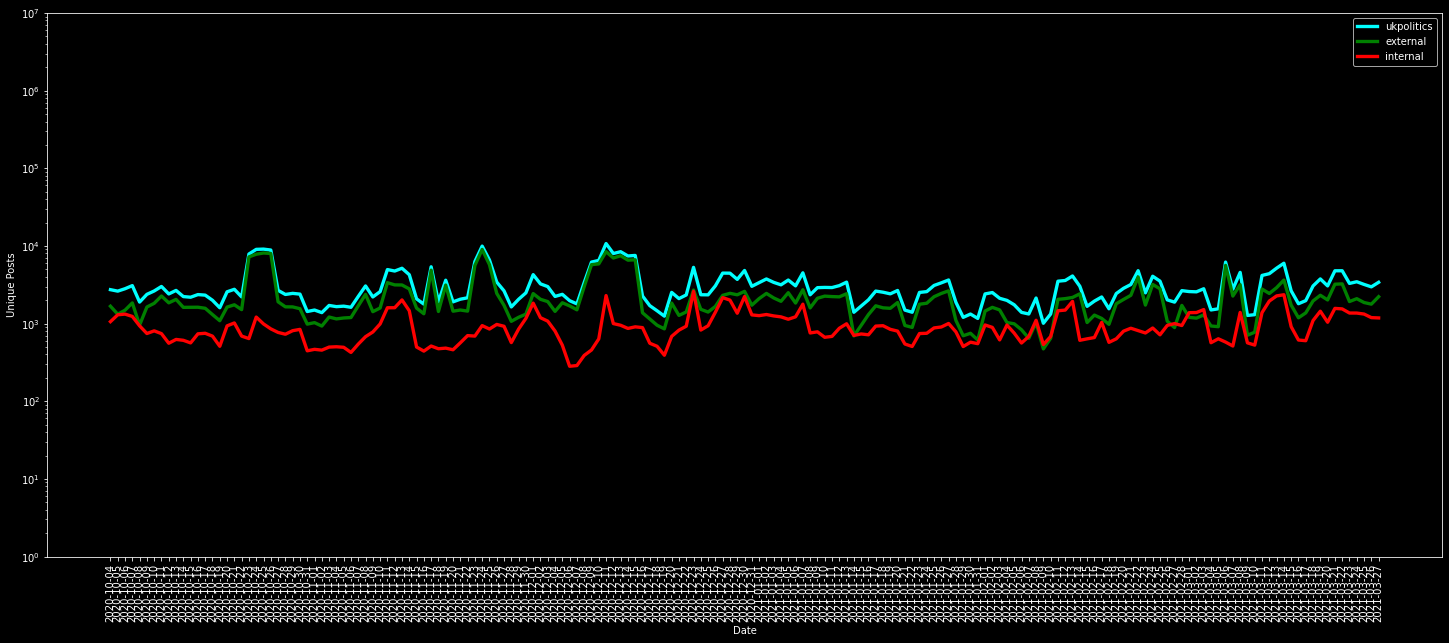

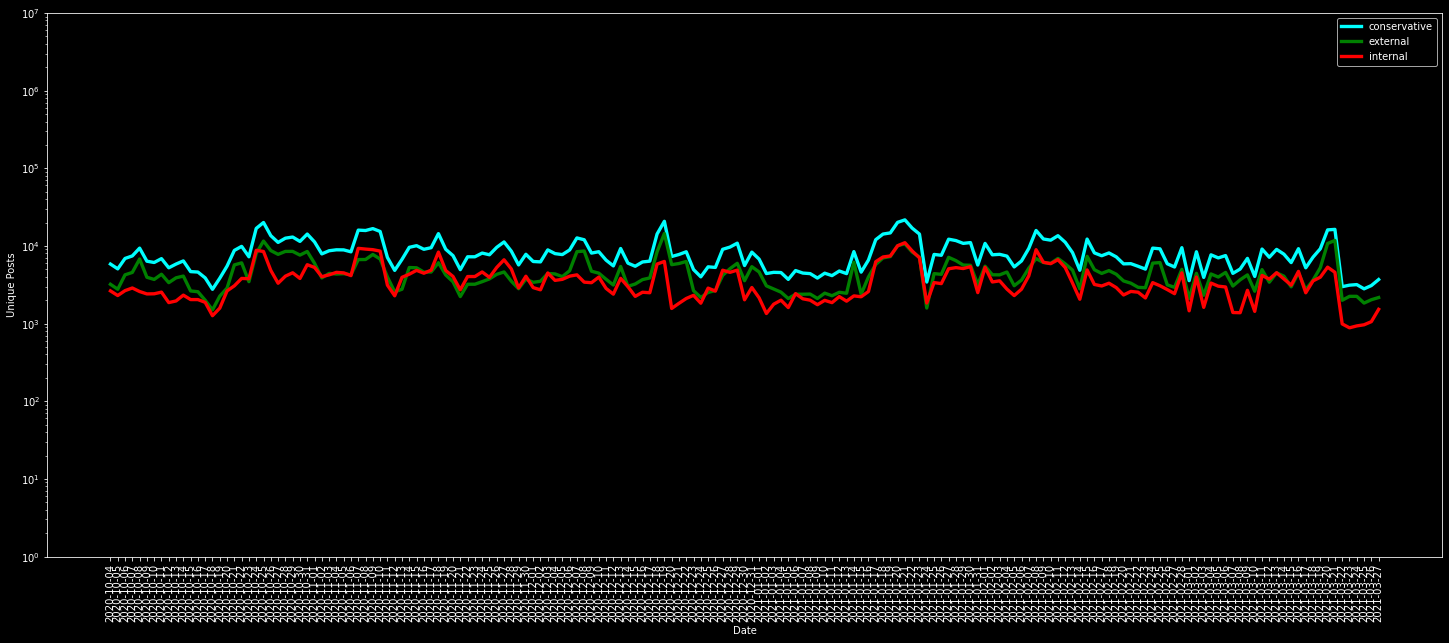

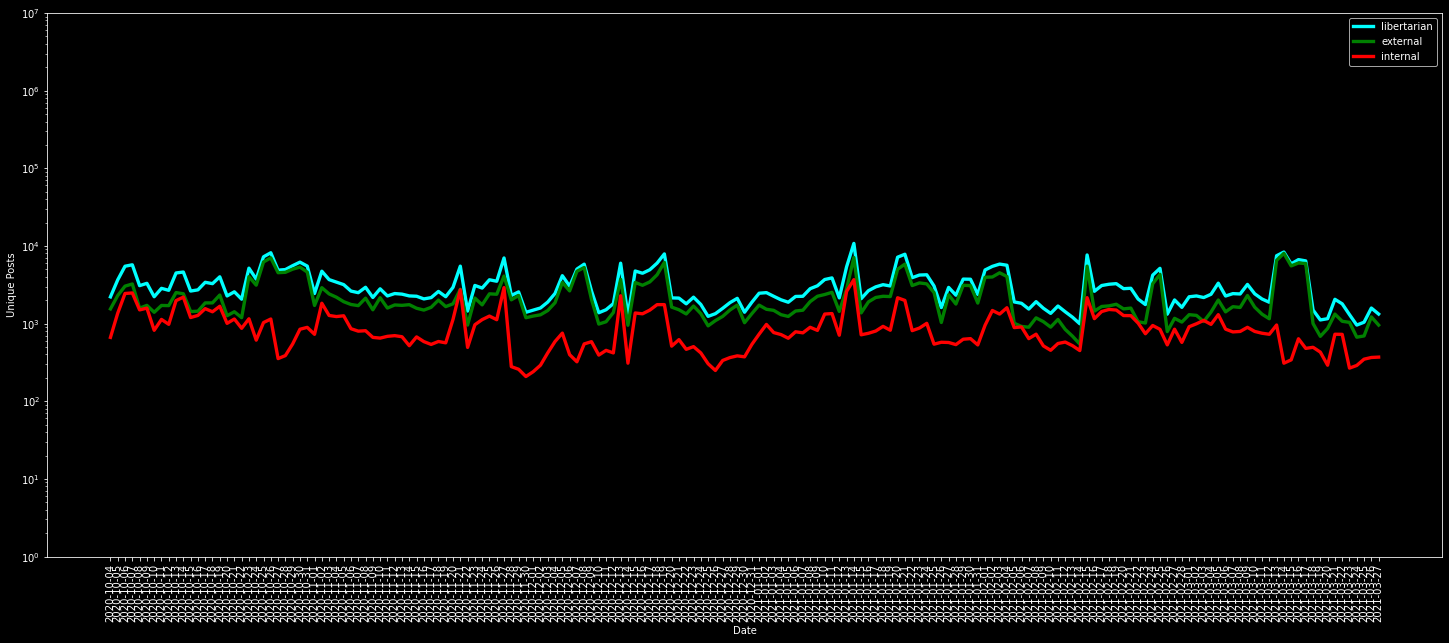

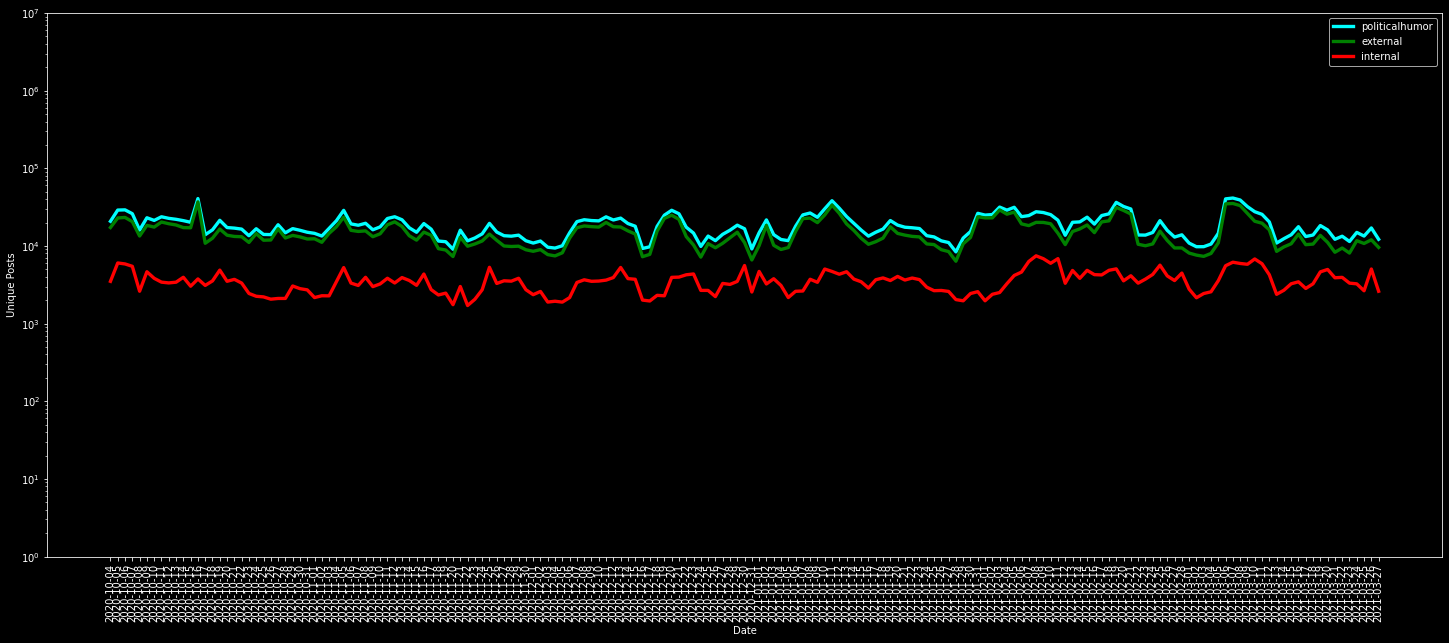

In [25]:
for sub in post_data[subbert].columns:
    fig = plt.figure(figsize=(25,10))
    plt.plot(_center_dates, [0 for _ in _center_dates], alpha=0)    
    plt.plot(post_data.index, e_data[subbert][sub] + i_data[subbert][sub], lw=3.333, c='cyan', label=sub)
    plt.plot(e_data.index, e_data[subbert][sub], lw=3.333, c='green', label='external')
    plt.plot(i_data.index, i_data[subbert][sub], lw=3.333, c='red', label='internal')
    plt.xticks(rotation=90)
    plt.xlabel('Date')
    plt.ylabel('Unique Posts')
    plt.ylim(1,10000000)
    plt.yscale('log')
    plt.legend()